# Invisible Friction in Freelance Communication  
### A System-Level Data Intelligence Project

##  Problem Statement
Most analytics dashboards focus on outcomes like revenue or delivery time.  
However, real-world failures often happen **before outcomes**, due to invisible system friction such as:
- Delayed responses
- Poor clarity
- Excessive back-and-forth
- Emotional and cognitive overload

This project aims to **quantify invisible friction** in freelance communication workflows using data-driven logic.



##  Objective
- Measure hidden inefficiencies in communication
- Identify bottlenecks that cause delays and drop-offs
- Create a **custom Friction Score** to represent invisible system stress
- Simulate system improvements using logic-based intelligence



##  Dataset Description
The dataset is synthetically generated to represent real freelance communication events.

### Key Columns
- `Response_Time_Hours`: Delay in replies
- `Back_and_Forth_Count`: Number of message exchanges
- `Clarity_Score`: Communication clarity (1–10)
- `Stage`: Inquiry, Discussion, Revision, Approval
- `Drop_Off`: Whether the client disengaged
- `Friction_Score`: Custom calculated metric

---

##  Friction Score Formula
Friction is calculated using weighted logic:

Friction Score =
- 40% Response Delay
- 30% Back-and-Forth
- 30% Lack of Clarity

This metric is **invented for this project** and represents invisible system inefficiency.



##  Analysis Goals
1. Identify stages with maximum friction
2. Analyze relationship between clarity and rework
3. Detect drop-off patterns
4. Visualize how small improvements reduce friction



##  Why This Project Is Unique
- No sales, no health, no finance clichés
- Focuses on **systems thinking**
- Invents a new analytical metric
- Explains *why* outcomes fail, not just *what* happened



##  Tools Used
- Python
- Pandas
- NumPy
- Matplotlib & Seaborn



##  Expected Outcome
A data-driven understanding of how invisible friction silently impacts performance — and how systems can be redesigned for efficiency.


===== SYSTEM OVERVIEW =====
Average Friction Score: 7.23
Average Response Time (hrs): 11.79
Drop-off Rate (%): 21.33


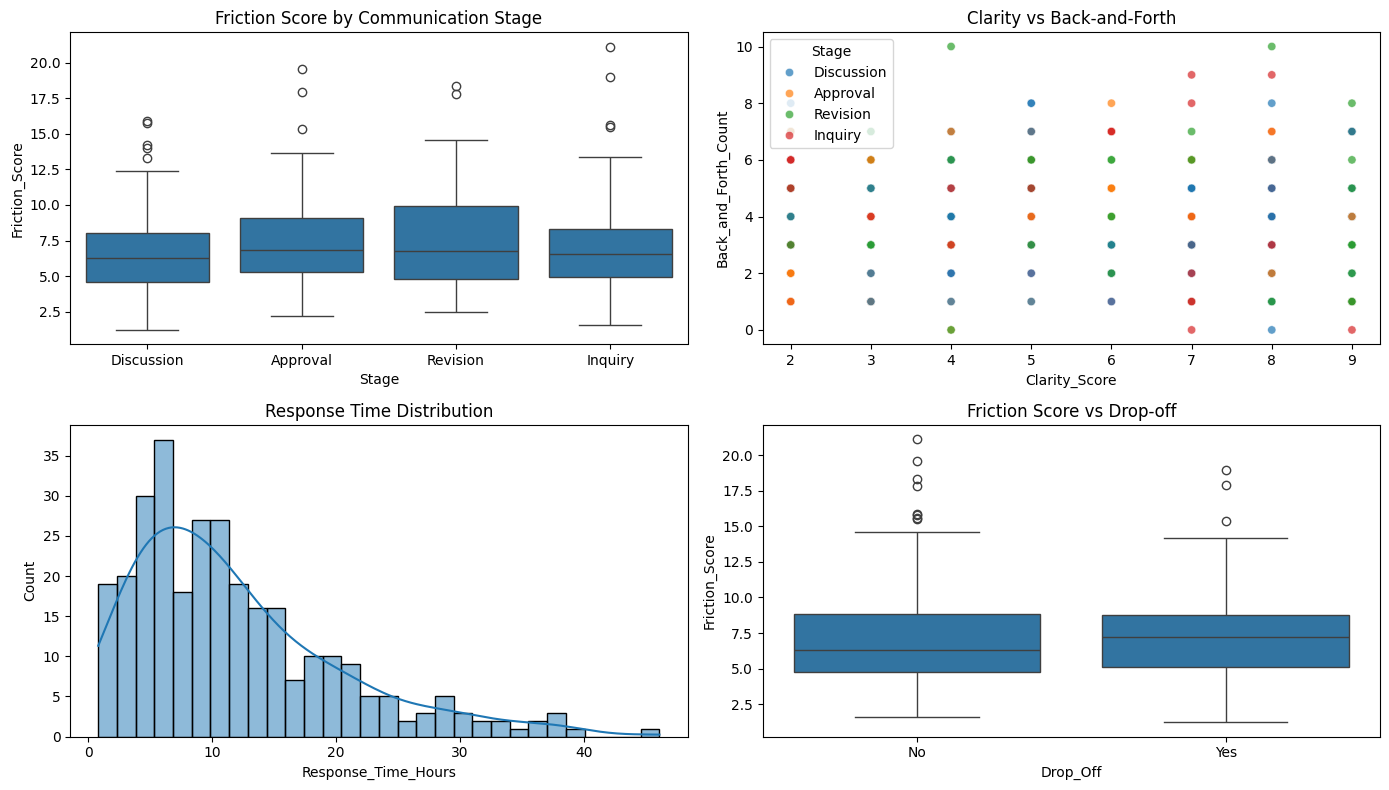


===== BOTTLENECK ANALYSIS =====
Stage
Approval      7.583524
Revision      7.561237
Inquiry       7.205226
Discussion    6.806337
Name: Friction_Score, dtype: float64


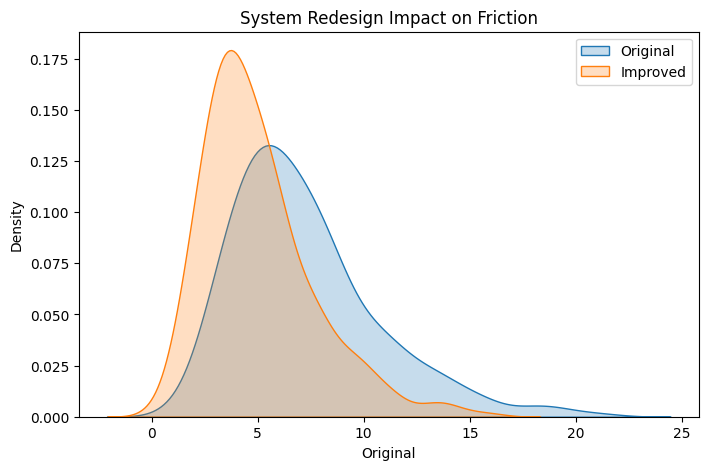


===== SYSTEM REDESIGN RESULT =====
Original Avg Friction: 7.23
Improved Avg Friction: 5.01
Efficiency Gain (%): 30.67


In [1]:
# ================================
# Invisible Friction Analysis Code
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Generate Synthetic Dataset
# -------------------------------

np.random.seed(42)

n = 300

data = pd.DataFrame({
    "Stage": np.random.choice(
        ["Inquiry", "Discussion", "Revision", "Approval"],
        size=n,
        p=[0.25, 0.35, 0.25, 0.15]
    ),
    "Response_Time_Hours": np.random.gamma(shape=2.0, scale=6.0, size=n),
    "Back_and_Forth_Count": np.random.poisson(lam=4, size=n),
    "Clarity_Score": np.random.randint(2, 10, size=n),
    "Drop_Off": np.random.choice(["Yes", "No"], size=n, p=[0.22, 0.78])
})

# -------------------------------
# 2. Friction Score Calculation
# -------------------------------

data["Friction_Score"] = (
    0.4 * data["Response_Time_Hours"] +
    0.3 * data["Back_and_Forth_Count"] +
    0.3 * (10 - data["Clarity_Score"])
)

# -------------------------------
# 3. Overview Metrics
# -------------------------------

print("===== SYSTEM OVERVIEW =====")
print("Average Friction Score:", round(data["Friction_Score"].mean(), 2))
print("Average Response Time (hrs):", round(data["Response_Time_Hours"].mean(), 2))
print("Drop-off Rate (%):", round((data["Drop_Off"] == "Yes").mean() * 100, 2))

# -------------------------------
# 4. Visualization Section
# -------------------------------

plt.figure(figsize=(14, 8))

# --- Friction by Stage ---
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Stage", y="Friction_Score")
plt.title("Friction Score by Communication Stage")

# --- Clarity vs Back-and-Forth ---
plt.subplot(2, 2, 2)
sns.scatterplot(
    data=data,
    x="Clarity_Score",
    y="Back_and_Forth_Count",
    hue="Stage",
    alpha=0.7
)
plt.title("Clarity vs Back-and-Forth")

# --- Response Time Distribution ---
plt.subplot(2, 2, 3)
sns.histplot(data["Response_Time_Hours"], bins=30, kde=True)
plt.title("Response Time Distribution")

# --- Drop-off vs Friction ---
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x="Drop_Off", y="Friction_Score")
plt.title("Friction Score vs Drop-off")

plt.tight_layout()
plt.show()

# -------------------------------
# 5. Bottleneck Identification
# -------------------------------

stage_friction = data.groupby("Stage")["Friction_Score"].mean().sort_values(ascending=False)

print("\n===== BOTTLENECK ANALYSIS =====")
print(stage_friction)

# -------------------------------
# 6. System Redesign Simulation
# -------------------------------

improved_data = data.copy()

# Simulate improvements
improved_data["Response_Time_Hours"] *= 0.75
improved_data["Back_and_Forth_Count"] *= 0.6
improved_data["Clarity_Score"] = np.clip(improved_data["Clarity_Score"] + 2, 1, 10)

improved_data["Improved_Friction_Score"] = (
    0.4 * improved_data["Response_Time_Hours"] +
    0.3 * improved_data["Back_and_Forth_Count"] +
    0.3 * (10 - improved_data["Clarity_Score"])
)

# Comparison
comparison = pd.DataFrame({
    "Original": data["Friction_Score"],
    "Improved": improved_data["Improved_Friction_Score"]
})

plt.figure(figsize=(8, 5))
sns.kdeplot(comparison["Original"], label="Original", fill=True)
sns.kdeplot(comparison["Improved"], label="Improved", fill=True)
plt.title("System Redesign Impact on Friction")
plt.legend()
plt.show()

print("\n===== SYSTEM REDESIGN RESULT =====")
print("Original Avg Friction:", round(comparison["Original"].mean(), 2))
print("Improved Avg Friction:", round(comparison["Improved"].mean(), 2))
print("Efficiency Gain (%):",
      round(
          (comparison["Original"].mean() - comparison["Improved"].mean())
          / comparison["Original"].mean() * 100, 2
      ))
